In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data from Feb 22 to August 3rd

death = pd.read_csv("deaths_ccvi.csv")

# categorize vulnerability into 3 categories low(<0.35) medimum(0.35<<0.65) high >0.65
def vulnerabilty(x):
    if x <= 0.35:
        y='low'
    elif x > 0.65:
        y='high'
    else:
        y='med'
    return y

death.loc[:,'vul'] = death.apply(lambda x: vulnerabilty(x['CCVI']),axis=1)
death_clean = death.drop(['countyFIPS','County Name','State','stateFIPS'],axis=1)

# Group counties based on vulnerability level (low-med-high)
df= death_clean.groupby(['vul']).sum()
df = df.drop(['CCVI'],axis=1)

# standardize cases per 100,000 in each category
df.iloc[:,:-1] = df.iloc[:,:-1].div(df.population,axis =0).mul(100000,axis=0)
df = df.drop(['population'],axis=1)
df= df.transpose()
df['date'] = df.index

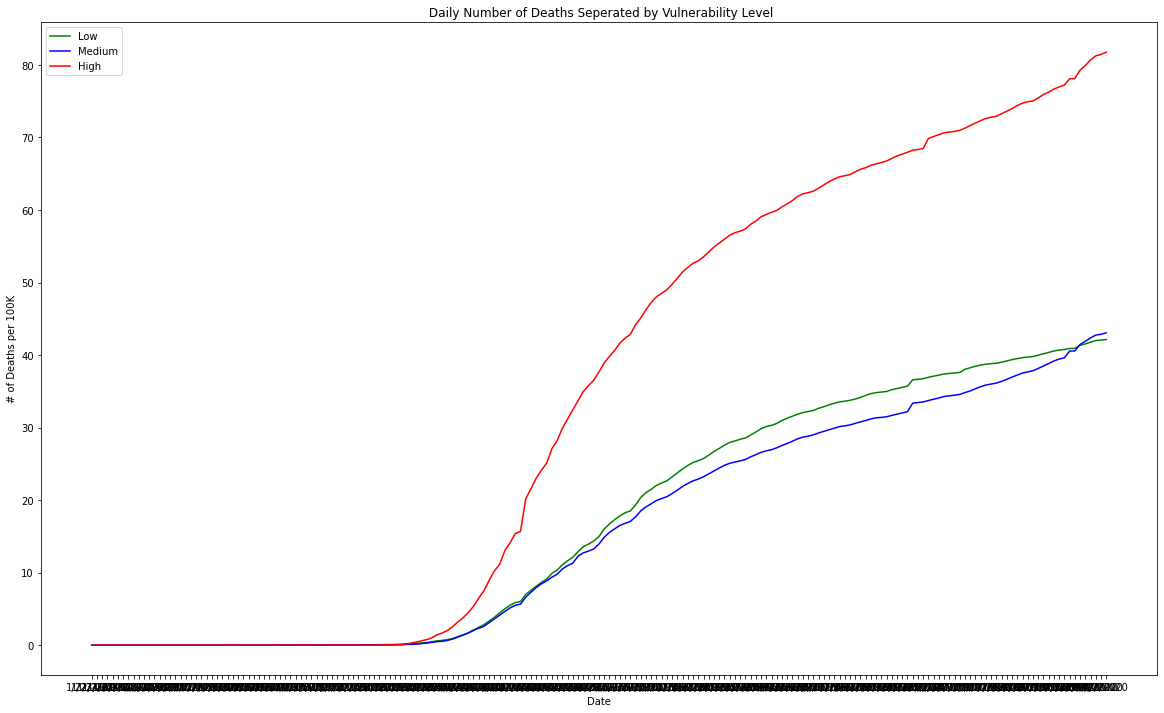

In [3]:
# plotting
fig=plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
#plot
ax.plot('date','low',data=df,color='green',label="Low")
ax.plot('date','med',data=df,color='blue',label="Medium")
ax.plot('date','high',data=df,color='red', label="High")
ax.legend()

#decorate
plt.xlabel('Date')
plt.title(' Daily Number of Deaths Seperated by Vulnerability Level')
plt.ylabel('# of Deaths per 100K')
#plt.xticks(rotation=90)


plt.show()